# Project Overview

This notebook evaluates the performance of trading strategies on market data.
We define strategies in strategies.py, including:

1. Moving Average Crossover (MAC): Generates buy/sell signals when a short-term moving average crosses a long-term moving average.

2. Momentum Strategy: Generates signals based on price momentum, comparing recent price differences.

The notebook loads market data, applies these strategies tick by tick, and tracks their signals and outcomes. The goal is to analyze how well each strategy performs under different conditions, comparing buy, sell, and hold recommendations to assess profitability and effectiveness. The notebook loads market data, applies these strategies tick by tick, and tracks their signals and outcomes.

Notes on strategy execution:
- Initial portfolio value of $10,000
- Longs were allocated 10% of remaining total cash (if BUY -> 10% of remaining cash)
- Trades are only executed when both strategies agree on the same action (buy, sell, or hold).

In [14]:
# Preliminaries

import pandas as pd
import matplotlib.pyplot as plt
from engine import MarketSimulation
from strategies import MAC, Momentum
from reporting import Reporting

# Performance Reporting

In [15]:
# Run simulation
mac_strategy = MAC(2, 5)
momentum_strategy = Momentum()
strategies = (mac_strategy, momentum_strategy)

sim = MarketSimulation(10_000, strategies)
nav_series = sim.run_simulation()

ERROR:root:ExecutionError thrown
Traceback (most recent call last):
  File "C:\Users\colek\PycharmProjects\finm32500_excelfilter\Assignment1\engine.py", line 43, in execute_order
    raise ExecutionError(f"***SIMULATED ERROR***\nFailed to update submit order to portfolio.\nAttempt {num_try+1} of {self.__order_retries}.")
models.ExecutionError: ***SIMULATED ERROR***
Failed to update submit order to portfolio.
Attempt 1 of 5.
ERROR:root:ExecutionError thrown
Traceback (most recent call last):
  File "C:\Users\colek\PycharmProjects\finm32500_excelfilter\Assignment1\engine.py", line 43, in execute_order
    raise ExecutionError(f"***SIMULATED ERROR***\nFailed to update submit order to portfolio.\nAttempt {num_try+1} of {self.__order_retries}.")
models.ExecutionError: ***SIMULATED ERROR***
Failed to update submit order to portfolio.
Attempt 1 of 5.
ERROR:root:ExecutionError thrown
Traceback (most recent call last):
  File "C:\Users\colek\PycharmProjects\finm32500_excelfilter\Assignment1\eng

In [16]:
# Initialize reporter
reporter = Reporting(nav_series)

# Compute performance metrics
total_return = reporter.compute_total_return()
sharpe = reporter.sharpe_ratio()
max_dd = reporter.max_drawdown()

print("Performance Results")
print("-------------------")
print(f"Total Return: {total_return:.2%}")
print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Max Drawdown: {max_dd:.2%}")

Performance Results
-------------------
Total Return: 4.54%
Sharpe Ratio: 0.91
Max Drawdown: -2.38%


# Performance Results

- Total Return: 4.54%
- Sharpe Ratio: 0.91
- Max Drawdown: -2.38%

The combined strategy delivered a total return of 4.54%, meaning that over the test period the portfolio grew modestly in value. While the return is not exceptionally high, it demonstrates that requiring agreement between the Moving Average Crossover and Momentum strategies can still generate positive performance.

The Sharpe ratio of 0.91 indicates that the returns achieved were reasonably attractive relative to the level of risk taken. However, because the ratio is below 1.0, it means the strategy is not providing a full unit of excess return for each unit of volatility. In other words, the portfolio is not being evenly compensated for the risk taken.

The maximum drawdown of -2.38% shows that the portfolio experienced a meaningful dip from peak to trough during the backtest. While not catastrophic, it does highlight the potential downside exposure of the combined strategy and suggests that risk management could be tightened further.

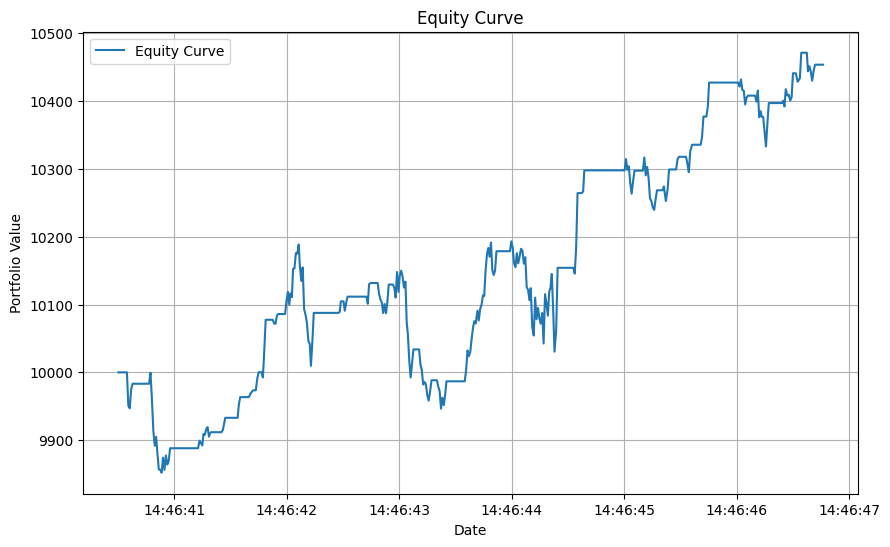

C:\Users\colek\PycharmProjects\finm32500_excelfilter\Assignment1\reporting.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  return self.equity_curve.resample(period).last().pct_change()


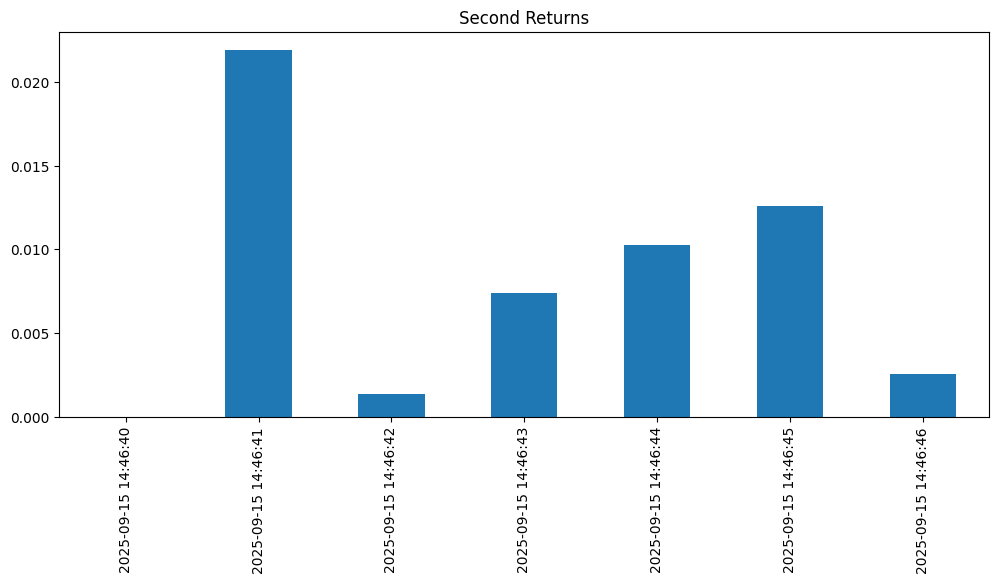

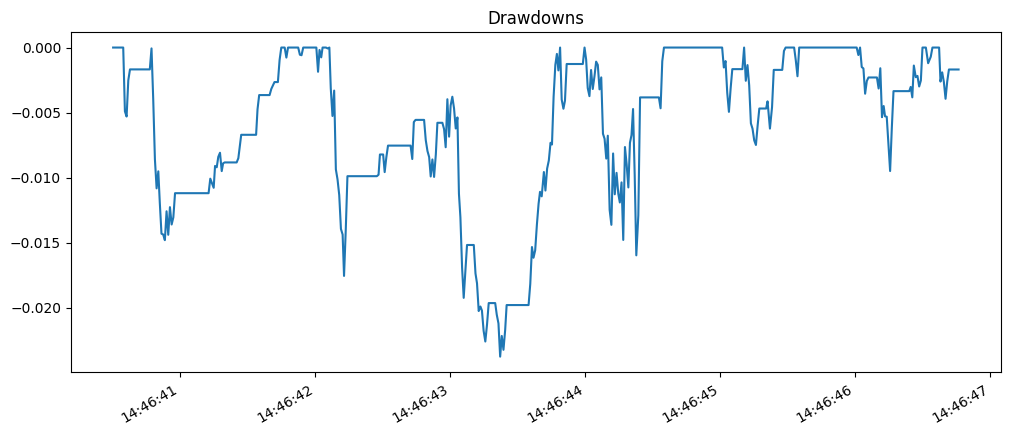

In [17]:
reporter.plot_equity_curve()

# Periodic returns (e.g. monthly)
monthly_returns = reporter.periodic_return('S')
monthly_returns.plot(kind="bar", figsize=(12,5), title="Second Returns")
plt.show()

# Drawdown plot
drawdown = (nav_series / nav_series.cummax()) - 1
drawdown.plot(figsize=(12,5), title="Drawdowns")
plt.show()

## Equity Curve Interpretation

The equity curve shows the portfolio performance of the combined strategy over the backtest period:

- **Initial Dip:** The portfolio begins near 10,000 and quickly falls below 9,900. This early drawdown reflects the strategy struggling in the initial trades, consistent with the reported maximum drawdown of **-2.38%**.  
- **Recovery and Growth:** After the dip, the curve trends upward with fluctuations, showing the strategy was able to recover losses and generate a positive return overall.  
- **Volatility:** The jagged shape indicates frequent ups and downs rather than a smooth climb. This aligns with the **Sharpe ratio of 0.91**, suggesting that returns came with relatively high variability compared to their size.  
- **Ending Position:** The portfolio closes above 10,400, which matches the reported **total return of 4.54%**. Despite the choppiness, the strategy ended in profit.  

**Overall:**  
The equity curve reflects a strategy that is modestly profitable but volatile. While the positive slope after the initial drawdown is encouraging, the uneven path indicates inconsistency in trade outcomes. Together with the Sharpe ratio, this suggests the strategy may benefit from refinement—such as filtering trades, adjusting position sizing, or tuning parameters—to achieve smoother and more efficient growth.

## Returns Series Analysis

The period ending **2025-09-15_14:46:41** recorded the highest return at approximately **2.2%**, significantly outperforming all other periods. The second-best period, ending **14:46:45**, achieved around **1.25%** return, while two other periods (ending in :43 and :44) showed moderate positive returns of roughly **0.75%** and **1.0%**, respectively. The weakest performance was observed in periods ending **:42** and **:46**, with :42 slightly negative and :46 showing minimal positive returns around **0.25%**.

Overall, there is significant variability in returns across these periods, ranging from near 0% to over 2%. Performance appears somewhat cyclical, with the strongest period (:41) followed by the weakest (:42), though most periods still show positive returns, indicating generally favorable outcomes. The large difference between the best and worst periods suggests high volatility or significant market events during these timeframes. This pattern could reflect differing market conditions or potentially the influence of different investment strategies or assets across these intervals.

## Drawdown Analysis

The maximum drawdown reached approximately **-2.3%** around 14:46:43, representing the largest peak-to-trough decline during the test period. This moderate drawdown suggests that downside exposure is reasonably contained, while the strategy’s ability to recover quickly indicates effective risk management.

Several distinct drawdown cycles are visible throughout the ~6 minutes of trading activity, with frequent recoveries to 0% drawdown, signaling new equity highs. Volatility clusters are noticeable, particularly around 14:46:44, where drawdowns and recoveries occurred in rapid succession. While most drawdowns are recovered quickly, a few persist longer before returning to peak equity levels, highlighting areas where risk management could be further refined.

From a performance perspective, the strategy shows a **Sharpe ratio of 0.91**, indicating modest but positive risk-adjusted returns. Although slightly below the commonly referenced threshold of 1.0, this suggests that the strategy generally compensates for the risk taken, but there is room for optimization. Overall, the drawdown profile and accompanying metrics indicate reasonable risk control, consistent recovery ability, and acceptable performance, while highlighting opportunities to reduce volatility and improve risk-adjusted returns.